In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

import keras
from keras import layers, models, optimizers

from scipy import integrate
from scipy import interpolate
from scipy.stats import norm

import time



def calcul_energie (abscisse,fonction):
  hbar = 1
  omega = 1
  m = 1
  a = -5.
  b = 5.

  #Calcul des interpolations
  tck_true = interpolate.splrep(abscisse, fonction, k=3, s=0)                        #F.O. fonction d'onde
  tck_true_carre = interpolate.splrep(abscisse, fonction*fonction, k=3, s=0)             #F.O. module carré
  tck_true_x = interpolate.splrep(abscisse, abscisse*abscisse*fonction*fonction, k=3, s=0)       #F.O. <x^2>
  der_true = interpolate.splev(abscisse, tck_true, der=1)                   #F.O. dérivée
  tck_true_der = interpolate.splrep(abscisse,der_true*der_true, k=3,s=0)         #F.O. dérivée spline 100
  int_true_carre = interpolate.splint(a,b,tck_true_carre)               #F.O. module carré
  int_true_x = interpolate.splint(a,b,tck_true_x)                       #F.O. <x^2>
  int_true_der = interpolate.splint(a,b,tck_true_der)                   #F.O. derivée carré
  #Calcul de l'énergie
  Energie = ((-pow(hbar,2)/(2*m))*(fonction[-1]*der_true[-1]-fonction[0]*der_true[0] 
                             - int_true_der) + 0.5*m*omega*int_true_x ) / int_true_carre
  return Energie


def normalisation (abscisse,fonction):
  tck_true_carre = interpolate.splrep(abscisse, fonction*fonction, s=0)             #F.O. module carré
  int_true_carre = interpolate.splint(a,b,tck_true_carre)                           #F.O. module carré
  fonction = fonction*pow(1/int_true_carre,1/2)

  return fonction





hbar = 1
omega = 1
m = 1
pts = 1000
a = -5.
b = 5.
x = a
h = 10/pts
linx = np.linspace (a,b,pts)





#vraie fonction d'onde
vraie_onde = np.zeros_like(linx, dtype=float)
for i in range(0,pts):
  vraie_onde[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h
#symétrisation
for j in range(0,pts):
    vraie_onde[j] = (vraie_onde[j]+vraie_onde[pts-1-j])/2
    vraie_onde[pts-1-j] = vraie_onde[j]
#normalisation
vraie_onde = normalisation(linx,vraie_onde)
#calcul de son énergie
energie_cible = calcul_energie(linx,vraie_onde)








#fonction d'onde aléatoire (entre 0 et 1)
onde = np.random.rand(pts)
#calcul de son énergie
energie_onde = calcul_energie(linx,onde)
#copie
premier_target = onde



temps = time.time()


#INITIALISATION DU MODEL
fits = 1000 #nombre de fits

model = models.Sequential([
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(1), # no activation -> linear function of the input
])
#model.summary()
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=opt)




for i in range(0,fits):

  print('fit n°',i+1)

  #fit de l'onde
  model.fit(linx,onde,epochs=1,batch_size=50,verbose=0)
  predictions = model.predict(linx)
  preds = predictions.reshape(-1)

  #calcul des énergies
  energie_preds = calcul_energie(linx,preds)

  #sélection de l'onde avec l'énergie la plus faible
  if (energie_preds < energie_onde):
    onde = preds
    energie_onde = energie_preds
    print('Energie onde = ',energie_preds)
    
    keras.backend.clear_session()
    model = models.Sequential([
      layers.Dense(200, input_shape=(1,), activation='relu'),
      layers.Dense(200, input_shape=(1,), activation='relu'),
      layers.Dense(200, input_shape=(1,), activation='relu'),
      layers.Dense(1), # no activation -> linear function of the input
    ])
    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',optimizer=opt)



temps2 = time.time()
print('Temps de calcul = ',temps2-temps)
print('Energie de référence = ',energie_cible)
print('Energie trouvée = ',energie_onde)
print('Energie 1er target = ',calcul_energie(linx,onde))




# Ecriture des fonctions d'onde
file1 = open("premier_target.txt", "w")
file2 = open("fct_theorique.txt", "w")
file3 = open("prediction.txt", "w")
file4 = open("abscisses.txt", "w")

np.savetxt(file1, premier_target, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file2, vraie_onde, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file3, onde, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file4, linx, fmt='%.18e', delimiter='', newline='\n')

file1.close()
file2.close()
file3.close()
file4.close()

fit n° 1
Energie onde =  6.796301574422914
fit n° 2
fit n° 3
fit n° 4
fit n° 5
Energie onde =  6.792121954530348
fit n° 6
fit n° 7
fit n° 8
Energie onde =  6.778705679084723
fit n° 9
fit n° 10
fit n° 11
Energie onde =  6.775855775546203
fit n° 12
fit n° 13
fit n° 14
Energie onde =  6.730722127763853
fit n° 15
fit n° 16
fit n° 17
Energie onde =  6.717555827839846
fit n° 18
fit n° 19
Energie onde =  6.697489833297256
fit n° 20
fit n° 21
fit n° 22
fit n° 23
fit n° 24
Energie onde =  6.6912837891561665
fit n° 25
fit n° 26
fit n° 27
Energie onde =  6.6792561811891815
fit n° 28
fit n° 29
Energie onde =  6.675395780928644
fit n° 30
fit n° 31
fit n° 32
Energie onde =  6.643419860935
fit n° 33
fit n° 34
fit n° 35
Energie onde =  6.603256916958524
fit n° 36
fit n° 37
fit n° 38
Energie onde =  6.557804423901074
fit n° 39
fit n° 40
fit n° 41
Energie onde =  6.548556645171037
fit n° 42
fit n° 43
Energie onde =  6.522949196720183
fit n° 44
fit n° 45
Energie onde =  6.4305180243957105
fit n° 46
fit n

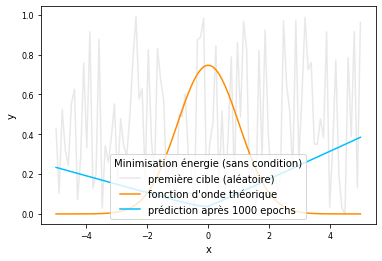

In [2]:
"""
import numpy as np
import matplotlib.pyplot as plt

premier_target = np.loadtxt("premier_target.txt", dtype=float, delimiter=' ')
vraie_onde = np.loadtxt("fct_theorique.txt", dtype=float, delimiter=' ')
onde = np.loadtxt("prediction.txt", dtype=float, delimiter=' ')
linx = np.loadtxt("abscisses.txt", dtype=float, delimiter=' ')
"""
plt.xlabel('x')
plt.ylabel('y')
plt.plot(linx,premier_target,c='lightgrey',label = "première cible (aléatoire)",alpha = 0.5)
plt.plot(linx,vraie_onde,c='darkorange',label = "fonction d'onde théorique")
plt.plot(linx,onde,c='deepskyblue',label = 'prédiction après 1000 epochs')
plt.legend(title = "Minimisation énergie (sans condition)" ,loc = 'lower center', prop={'size': 10})
plt.tick_params(axis='both',labelsize=8)
plt.savefig('minimisation_sans_condition.pdf')